## Importing libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [1]:
#pip install -U seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity="all"

In [3]:
df =pd.read_csv("hotaldataClean1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87230 entries, 0 to 87229
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   87230 non-null  int64  
 1   LeadTime                     87230 non-null  int64  
 2   ArrivalDateYear              87230 non-null  int64  
 3   ArrivalDateMonth             87230 non-null  object 
 4   ArrivalDateWeekNumber        87230 non-null  int64  
 5   ArrivalDateDayOfMonth        87230 non-null  int64  
 6   StaysInWeekendNights         87230 non-null  int64  
 7   StaysInWeekNights            87230 non-null  int64  
 8   Adults                       87230 non-null  int64  
 9   Children                     87230 non-null  float64
 10  Babies                       87230 non-null  int64  
 11  Meal                         87230 non-null  object 
 12  Country                      87230 non-null  object 
 13  MarketSegment   

## Modifying to relavant attribute types in the dataframe

In [3]:

df['ReservationStatusDate']= pd.to_datetime(df['ReservationStatusDate'])
df["IsCanceled"] = df["IsCanceled"].astype("category")
df["ArrivalDateYear"] = df["ArrivalDateYear"].astype("category")
df["ArrivalDateMonth"] = df["ArrivalDateMonth"].astype("category")
df["Meal"] = df["Meal"].astype("category")
df["Country"] = df["Country"].astype("category")
df["MarketSegment"] = df["MarketSegment"].astype("category")
df["DistributionChannel"] = df["DistributionChannel"].astype("category")
df["IsRepeatedGuest"] = df["IsRepeatedGuest"].astype("category")
df["ReservedRoomType"] = df["ReservedRoomType"].astype("category")
df["AssignedRoomType"] = df["AssignedRoomType"].astype("category")
df["DepositType"] = df["DepositType"].astype("category")
df["Agent"] = df["Agent"].astype("category")
df["CustomerType"] = df["CustomerType"].astype("category")
df["ReservationStatus"] = df["ReservationStatus"].astype("category")
df["Hotal"] = df["Hotal"].astype("category")

# Displaying Dataframe Structure

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87230 entries, 0 to 87229
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IsCanceled                   87230 non-null  category      
 1   LeadTime                     87230 non-null  int64         
 2   ArrivalDateYear              87230 non-null  category      
 3   ArrivalDateMonth             87230 non-null  category      
 4   ArrivalDateWeekNumber        87230 non-null  int64         
 5   ArrivalDateDayOfMonth        87230 non-null  int64         
 6   StaysInWeekendNights         87230 non-null  int64         
 7   StaysInWeekNights            87230 non-null  int64         
 8   Adults                       87230 non-null  int64         
 9   Children                     87230 non-null  float64       
 10  Babies                       87230 non-null  int64         
 11  Meal                         87230 non-nu

# decsribing the stats for numerical attributes

In [5]:
df.describe()  

,LeadTime,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,79.971019,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,0.030402,0.184054,0.268497,0.746291,106.518031,0.084306,0.698934
std,86.058683,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,0.369344,1.733033,0.710633,10.001001,54.891227,0.281659,0.832051
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,11.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,49.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.200000,0.000000,0.000000
75%,125.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.shape

(87230, 31)

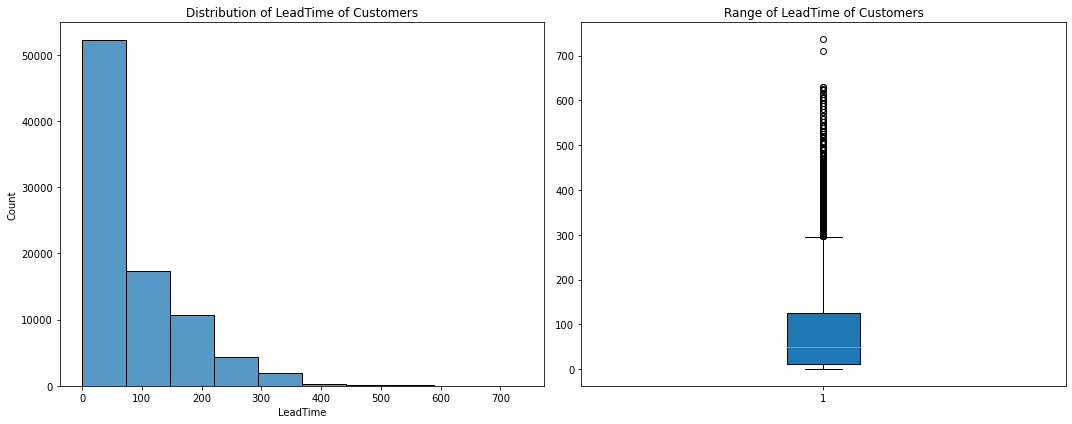

In [6]:
fig, axes = plt.subplots(1,2,figsize=(15,6)) 
sb.histplot(df['LeadTime'],bins=10,ax=axes[0])
plt.boxplot(df['LeadTime'],patch_artist = True)
axes[0].set_title('Distribution of LeadTime of Customers')
axes[1].set_title('Range of LeadTime of Customers')
plt.tight_layout()
plt.show()

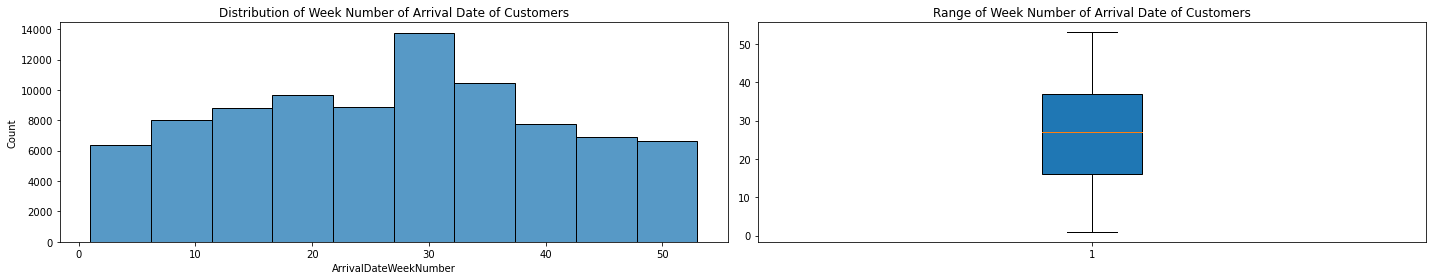

In [7]:
fig, axes = plt.subplots(1,2, figsize=(20,4))

sb.histplot(df['ArrivalDateWeekNumber'],bins=10,ax=axes[0])
plt.boxplot(df['ArrivalDateWeekNumber'],patch_artist = True)

axes[0].set_title('Distribution of Week Number of Arrival Date of Customers')
axes[1].set_title('Range of Week Number of Arrival Date of Customers')
plt.tight_layout()
#plt.savefig("hist of ArrivalDateWeekNumber.png" )
plt.show()

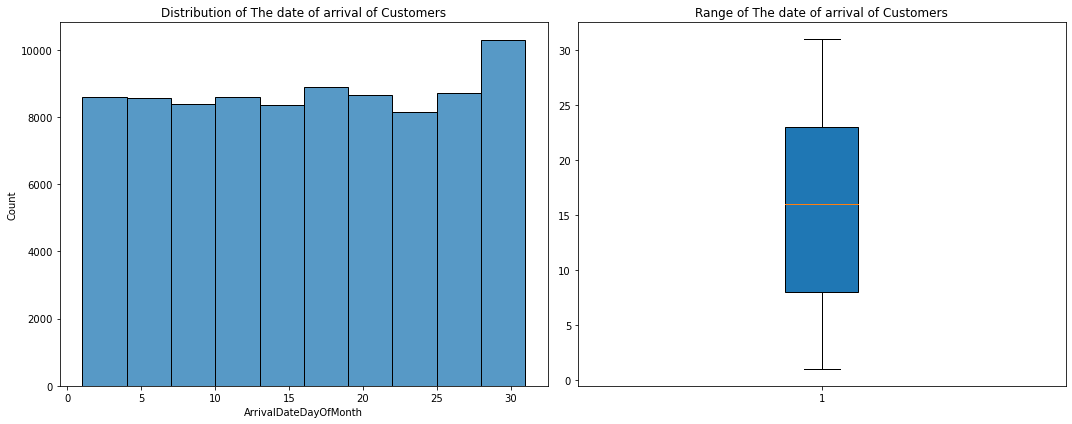

In [8]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
sb.histplot(df['ArrivalDateDayOfMonth'],bins=10,ax=axes[0])
plt.boxplot(df['ArrivalDateDayOfMonth'],patch_artist = True)

axes[0].set_title('Distribution of The date of arrival of Customers')
axes[1].set_title('Range of The date of arrival of Customers')
plt.tight_layout()
#plt.savefig("hist of ArrivalDateDayOfMonth.png" )
plt.show()

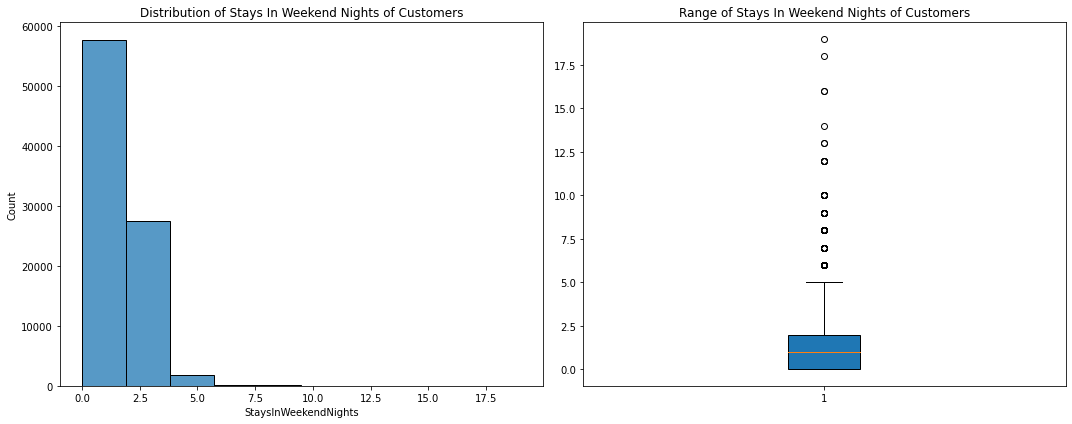

In [9]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['StaysInWeekendNights'],bins=10,ax=axes[0])
plt.boxplot(df['StaysInWeekendNights'],patch_artist=True)
 
axes[0].set_title('Distribution of Stays In Weekend Nights of Customers')
axes[1].set_title('Range of Stays In Weekend Nights of Customers')
plt.tight_layout()
#plt.savefig("hist of StaysInWeekendNights.png" )
plt.show()

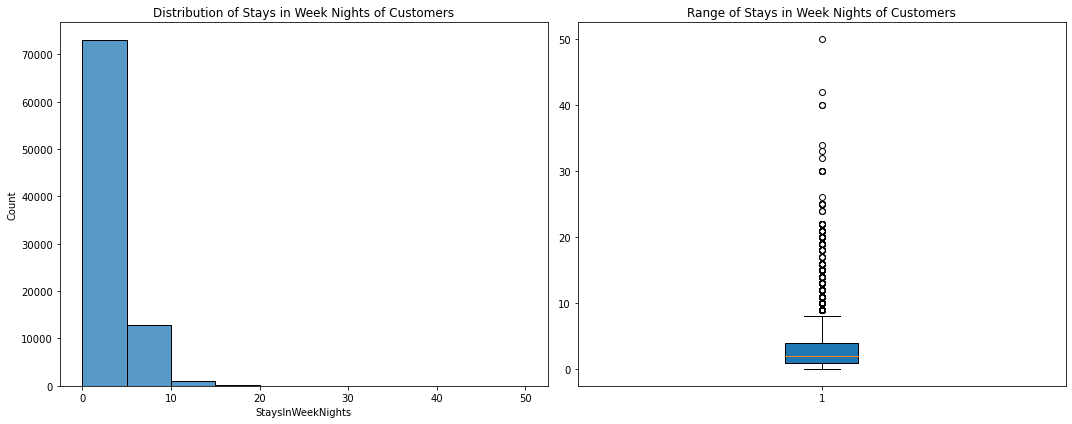

In [10]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['StaysInWeekNights'],bins= 10,ax=axes[0])  
plt.boxplot(df['StaysInWeekNights'],patch_artist=True) 
axes[0].set_title('Distribution of Stays in Week Nights of Customers')
axes[1].set_title('Range of Stays in Week Nights of Customers')
plt.tight_layout()
#plt.savefig("hist of StaysInWeekNights.png" )
plt.show()

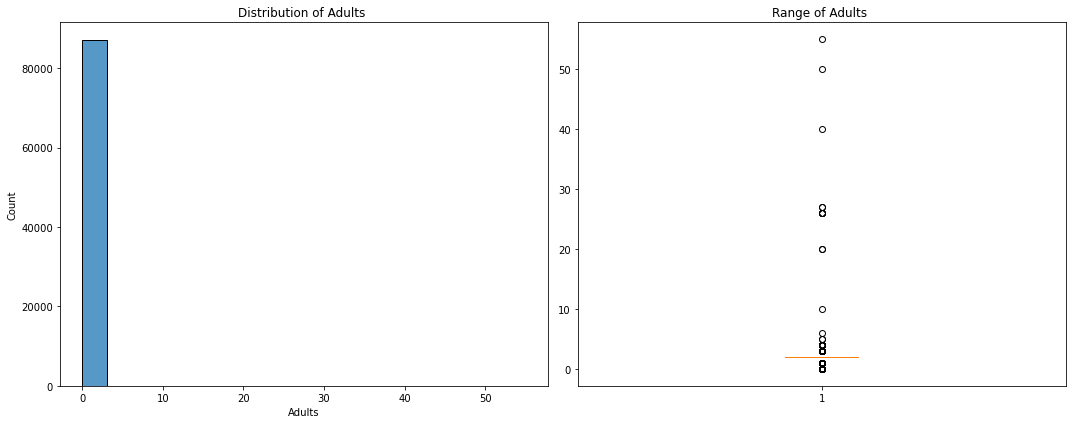

In [11]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['Adults'],ax=axes[0])  


plt.boxplot(df['Adults'],patch_artist=True) 
axes[0].set_title('Distribution of Adults ')
axes[1].set_title('Range of Adults ')
plt.tight_layout()
#plt.savefig("hist of Adults.png" )
plt.show()

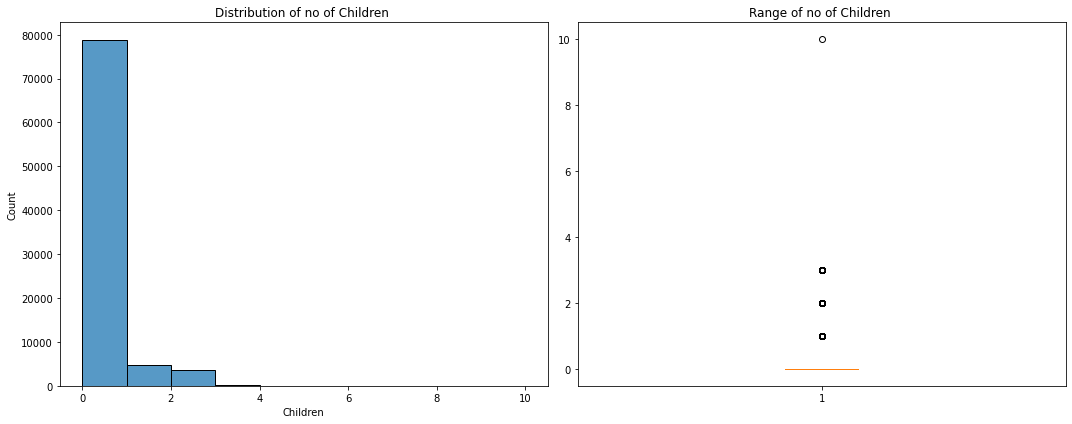

In [12]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['Children'],bins= 10,ax=axes[0])  


plt.boxplot(df['Children'],patch_artist=True) 
axes[0].set_title('Distribution of no of Children ')
axes[1].set_title('Range of no of Children ')
plt.tight_layout()
#plt.savefig("hist of Children.png" )
plt.show()

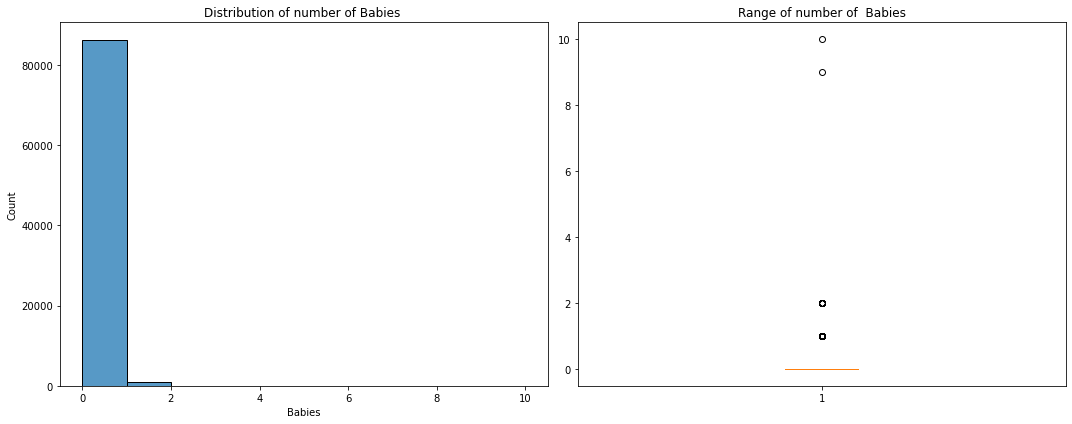

In [13]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['Babies'],bins= 10,ax=axes[0])  


plt.boxplot(df['Babies'],patch_artist=True)## Whiskers in the Boxplot shows that there are outliers 
axes[0].set_title('Distribution of number of Babies ')
axes[1].set_title('Range of number of  Babies')
plt.tight_layout()
#plt.savefig("hist of Babies.png" )
plt.show()

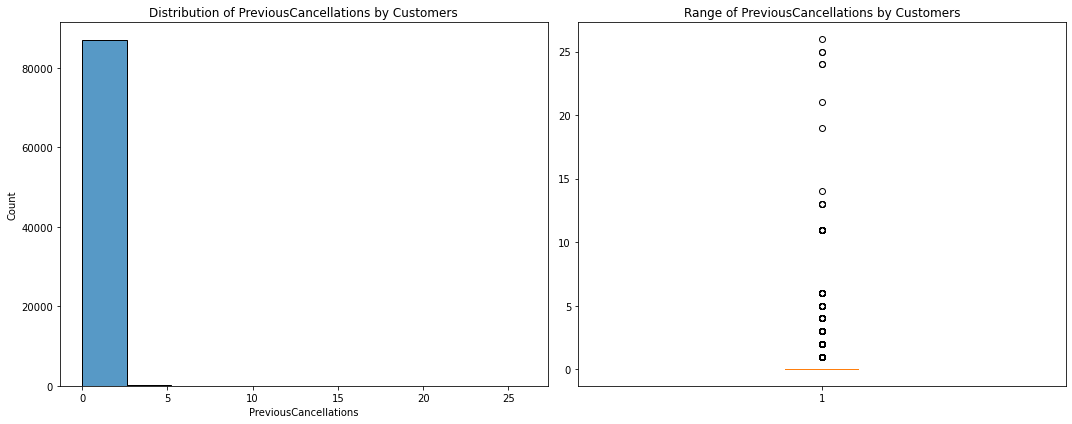

In [14]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['PreviousCancellations'],bins= 10,ax=axes[0])  


plt.boxplot(df['PreviousCancellations'],patch_artist=True) 
axes[0].set_title('Distribution of PreviousCancellations by Customers')
axes[1].set_title('Range of PreviousCancellations by Customers')
plt.tight_layout()
#plt.savefig("hist of PreviousCancellations.png" )
plt.show()

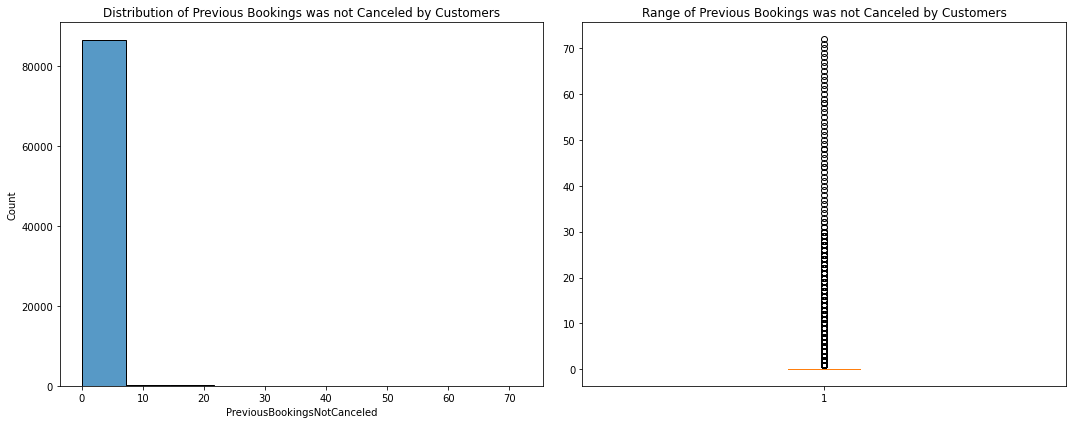

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['PreviousBookingsNotCanceled'],bins= 10,ax=axes[0])  


plt.boxplot(df['PreviousBookingsNotCanceled'],patch_artist=True)## Whiskers in the Boxplot shows that there are outliers 
axes[0].set_title('Distribution of Previous Bookings was not Canceled by Customers')
axes[1].set_title('Range of Previous Bookings was not Canceled by Customers')
plt.tight_layout()
#plt.savefig("hist of PreviousBookingsNotCanceled.png" )
plt.show()

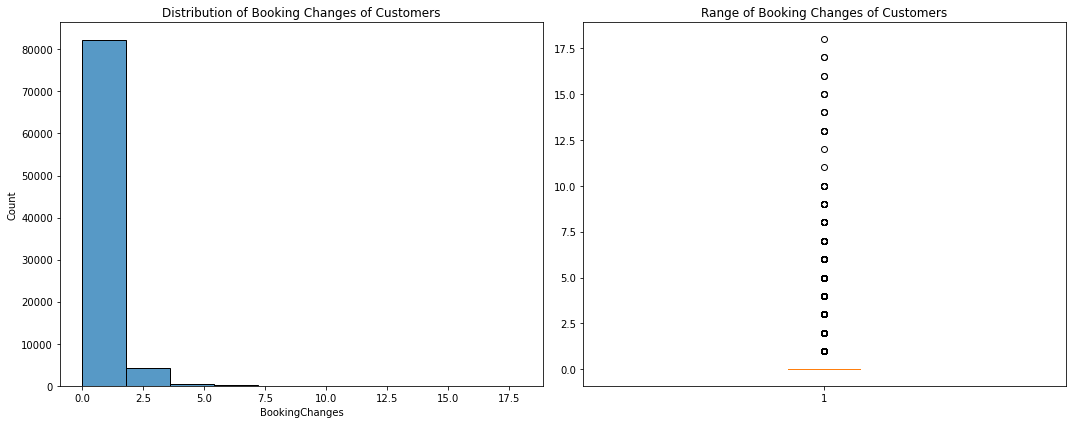

In [16]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['BookingChanges'],bins= 10,ax=axes[0])  


plt.boxplot(df['BookingChanges'],patch_artist=True)## Whiskers in the Boxplot shows that there are outliers 
axes[0].set_title('Distribution of Booking Changes of Customers')
axes[1].set_title('Range of Booking Changes of Customers')
plt.tight_layout()
#plt.savefig("hist of BookingChanges.png" )
plt.show()

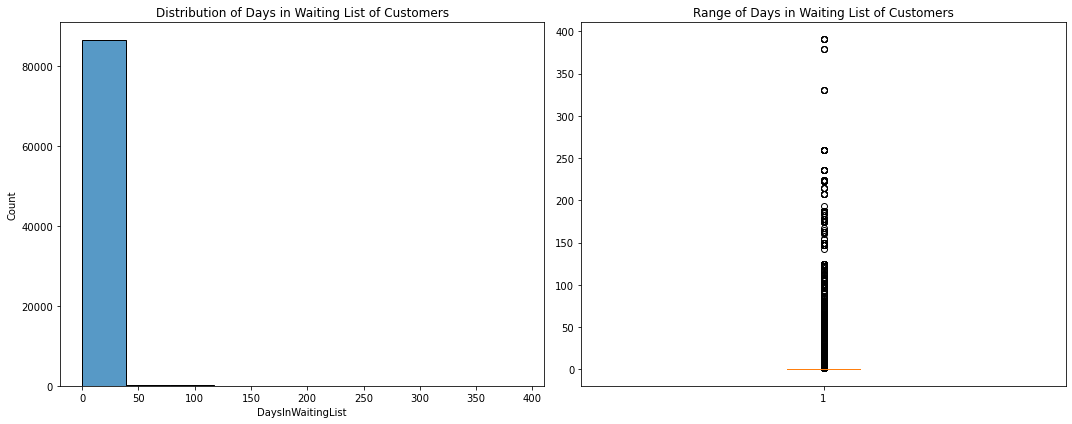

In [17]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['DaysInWaitingList'],bins=10,ax=axes[0])  


plt.boxplot(df['DaysInWaitingList'],patch_artist=True)## Whiskers in the Boxplot shows that there are outliers 
axes[0].set_title('Distribution of Days in Waiting List of Customers')
axes[1].set_title('Range of Days in Waiting List of Customers')
plt.tight_layout()
#plt.savefig("hist of DaysInWaitingList.png" )
plt.show()

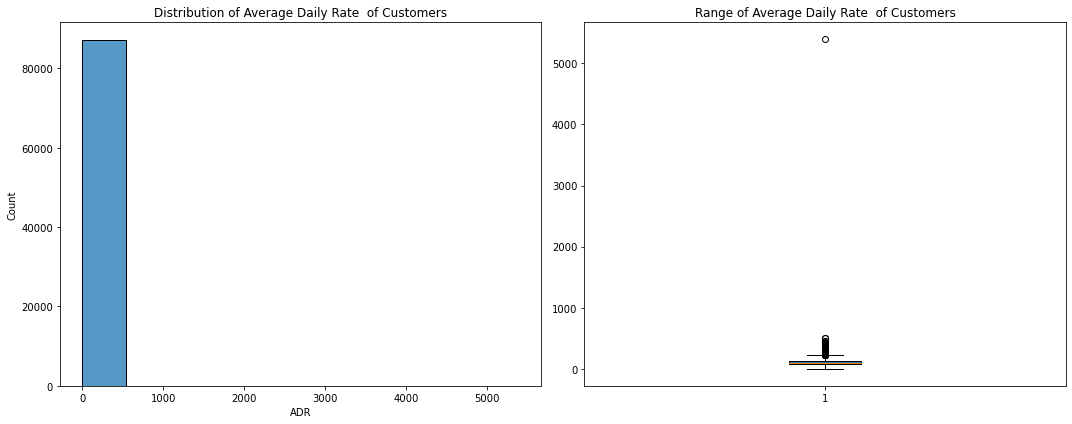

In [18]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['ADR'],bins=10,ax=axes[0])  


plt.boxplot(df['ADR'],patch_artist=True)
axes[0].set_title('Distribution of Average Daily Rate  of Customers')
axes[1].set_title('Range of Average Daily Rate  of Customers')
plt.tight_layout()
#plt.savefig("hist of ADR.png" )
plt.show()

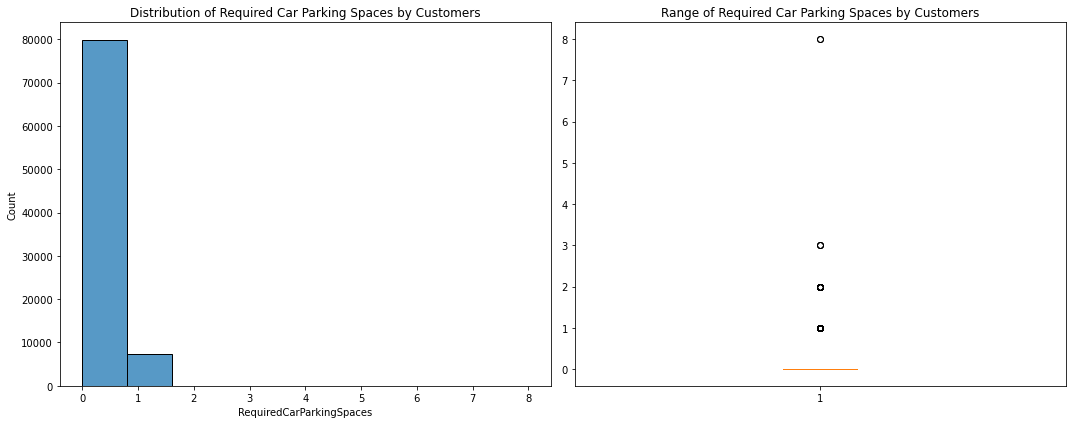

In [19]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['RequiredCarParkingSpaces'],bins= 10, ax=axes[0])  


plt.boxplot(df['RequiredCarParkingSpaces'],patch_artist=True)## Whiskers in the Boxplot shows that there are outliers 
axes[0].set_title('Distribution of Required Car Parking Spaces by Customers')
axes[1].set_title('Range of Required Car Parking Spaces by Customers')
plt.tight_layout()
#plt.savefig("hist of RequiredCarParkingSpaces.png" )
plt.show()

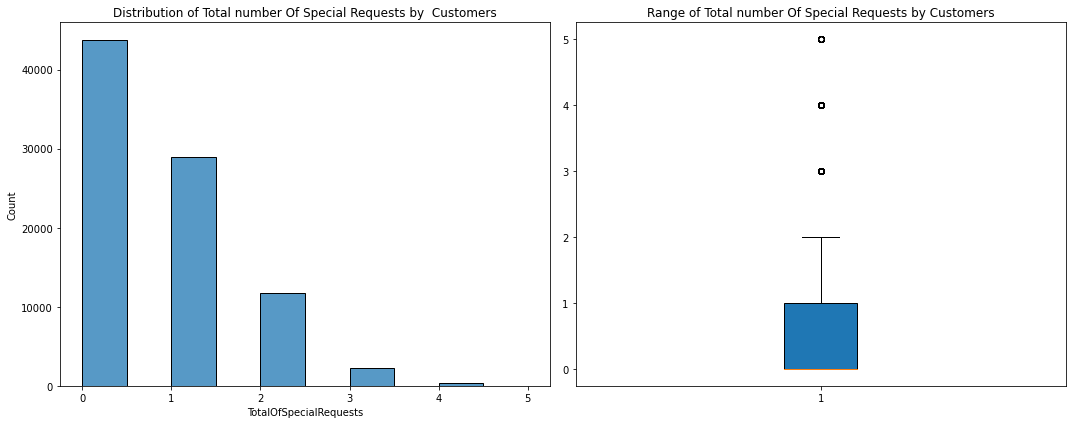

In [20]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['TotalOfSpecialRequests'],bins= 10,ax=axes[0])  


plt.boxplot(df['TotalOfSpecialRequests'],patch_artist=True)## Whiskers in the Boxplot shows that there are outliers 
axes[0].set_title('Distribution of Total number Of Special Requests by  Customers')
axes[1].set_title('Range of Total number Of Special Requests by Customers')
plt.tight_layout()
#plt.savefig("hist of TotalOfSpecialRequests.png" )
plt.show()

In [21]:
numeric = []
category = []
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric.append(col)
    else:
         category.append(col)
print("category :",category)
        
    
     

category : ['IsCanceled', 'ArrivalDateYear', 'ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 'CustomerType', 'ReservationStatus', 'ReservationStatusDate', 'Hotal']


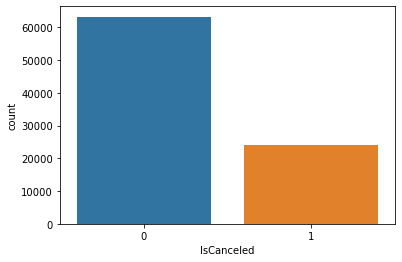

In [23]:
chart = sb.countplot(df["IsCanceled"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of IsCanceled.png" )
plt.show()

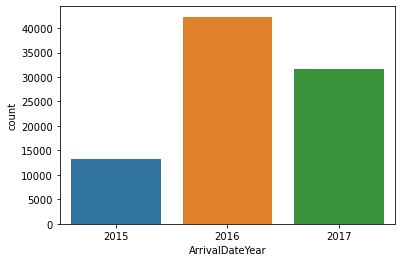

In [24]:
chart = sb.countplot(df["ArrivalDateYear"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of ArrivalDateYear.png" )
plt.show()

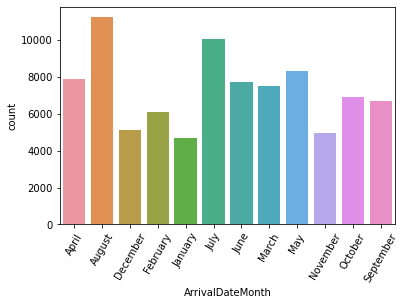

In [25]:
chart = sb.countplot(df["ArrivalDateMonth"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels(),rotation=60)
#plt.savefig("A.png",bbox_inches='tight' )
plt.show()

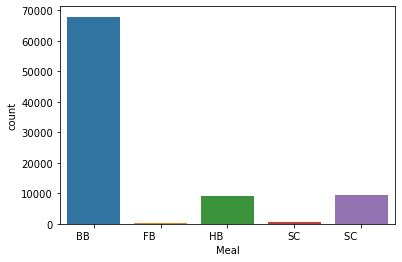

In [26]:
chart = sb.countplot(df["Meal"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of Meal.png" )
plt.show()

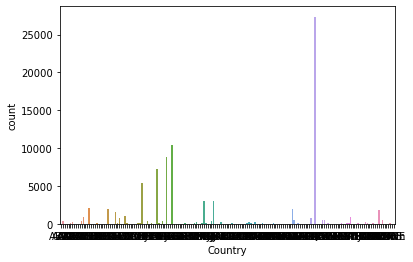

In [27]:
chart = sb.countplot(df["Country"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of Country.png" )
plt.show()

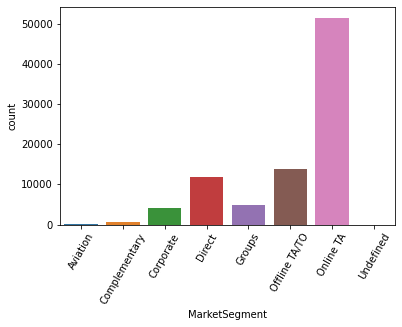

In [299]:
chart = sb.countplot(df["MarketSegment"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels(),rotation=60)
#plt.savefig("hist of MarketSegment.png",bbox_inches='tight' )
plt.show()

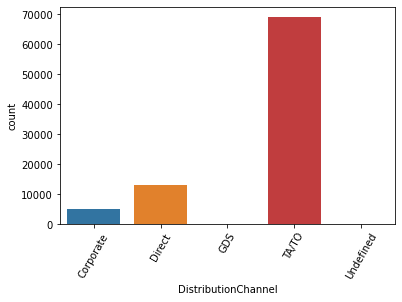

In [28]:
chart = sb.countplot(df["DistributionChannel"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels(),rotation=60)
plt.savefig("hist of DistributionChannel.png",bbox_inches='tight'  )
plt.show()

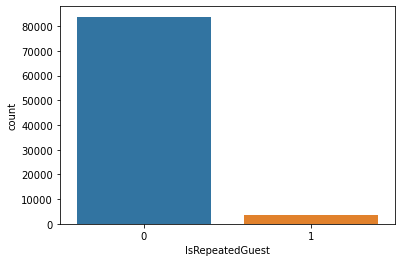

In [29]:
chart = sb.countplot(df["IsRepeatedGuest"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of IsRepeatedGuest.png" )
plt.show()

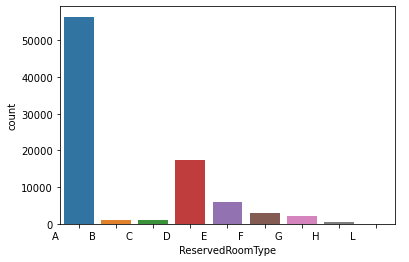

In [30]:
chart = sb.countplot(df["ReservedRoomType"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of ReservedRoomType.png" )
plt.show()

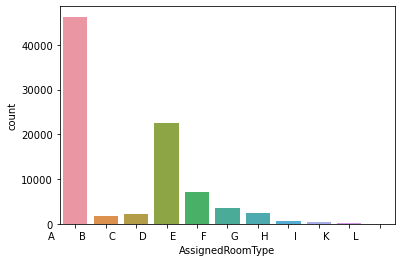

In [31]:
chart = sb.countplot(df["AssignedRoomType"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of AssignedRoomType.png" )
plt.show()

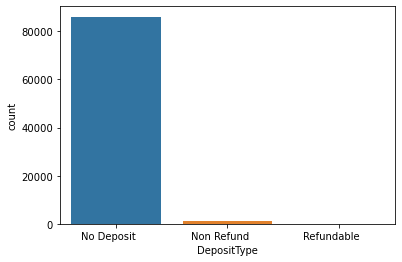

In [32]:
chart = sb.countplot(df["DepositType"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of DepositType.png" )
plt.show()

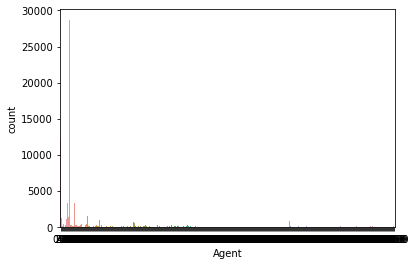

In [33]:
chart = sb.countplot(df["Agent"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of Agent.png" )
plt.show()

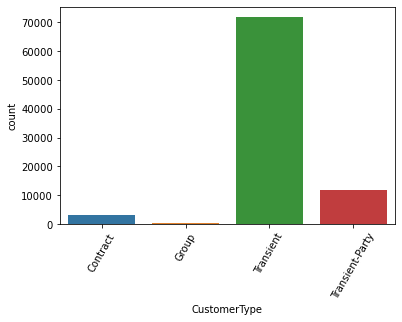

In [34]:
chart = sb.countplot(df["CustomerType"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels(),rotation=60)
#plt.savefig("hist of CustomerType.png",bbox_inches='tight' )
plt.show()

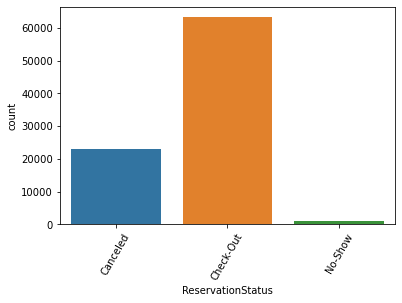

In [35]:
chart = sb.countplot(df["ReservationStatus"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels(),rotation=60)
#plt.savefig("hist of ReservationStatus.png",bbox_inches='tight' )
plt.show()

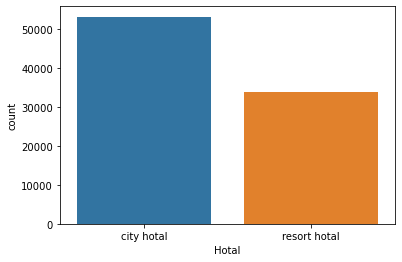

In [36]:
chart = sb.countplot(df["Hotal"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of Hotal.png" )
plt.show()

# correlation

In [109]:
corr =df.corr().round(2)
corr
#corr.to_csv("corr2.csv",index=True)



,LeadTime,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
LeadTime,1.00,0.10,0.01,0.24,0.31,0.14,0.03,-0.00,0.01,-0.08,0.08,0.13,0.02,-0.09,0.03
ArrivalDateWeekNumber,0.10,1.00,0.09,0.03,0.03,0.03,0.01,0.01,0.01,-0.02,0.01,0.01,0.10,0.01,0.05
ArrivalDateDayOfMonth,0.01,0.09,1.00,-0.02,-0.03,-0.00,0.02,-0.00,-0.01,0.00,0.01,0.01,0.02,0.01,-0.00
StaysInWeekendNights,0.24,0.03,-0.02,1.00,0.55,0.09,0.03,0.01,-0.02,-0.06,0.03,-0.03,0.04,-0.04,0.03
StaysInWeekNights,0.31,0.03,-0.03,0.55,1.00,0.10,0.03,0.02,-0.02,-0.06,0.07,0.00,0.06,-0.04,0.04
Adults,0.14,0.03,-0.00,0.09,0.10,1.00,0.02,0.02,-0.04,-0.12,-0.04,-0.01,0.24,0.01,0.11
Children,0.03,0.01,0.02,0.03,0.03,0.02,1.00,0.02,-0.02,-0.03,0.03,-0.02,0.33,0.04,0.04
Babies,-0.00,0.01,-0.00,0.01,0.02,0.02,0.02,1.00,-0.01,-0.01,0.08,-0.01,0.02,0.03,0.09
PreviousCancellations,0.01,0.01,-0.01,-0.02,-0.02,-0.04,-0.02,-0.01,1.00,0.39,-0.01,0.00,-0.05,-0.00,0.00
PreviousBookingsNotCanceled,-0.08,-0.02,0.00,-0.06,-0.06,-0.12,-0.03,-0.01,0.39,1.00,0.01,-0.01,-0.09,0.04,0.03


# Correlation Heatmap

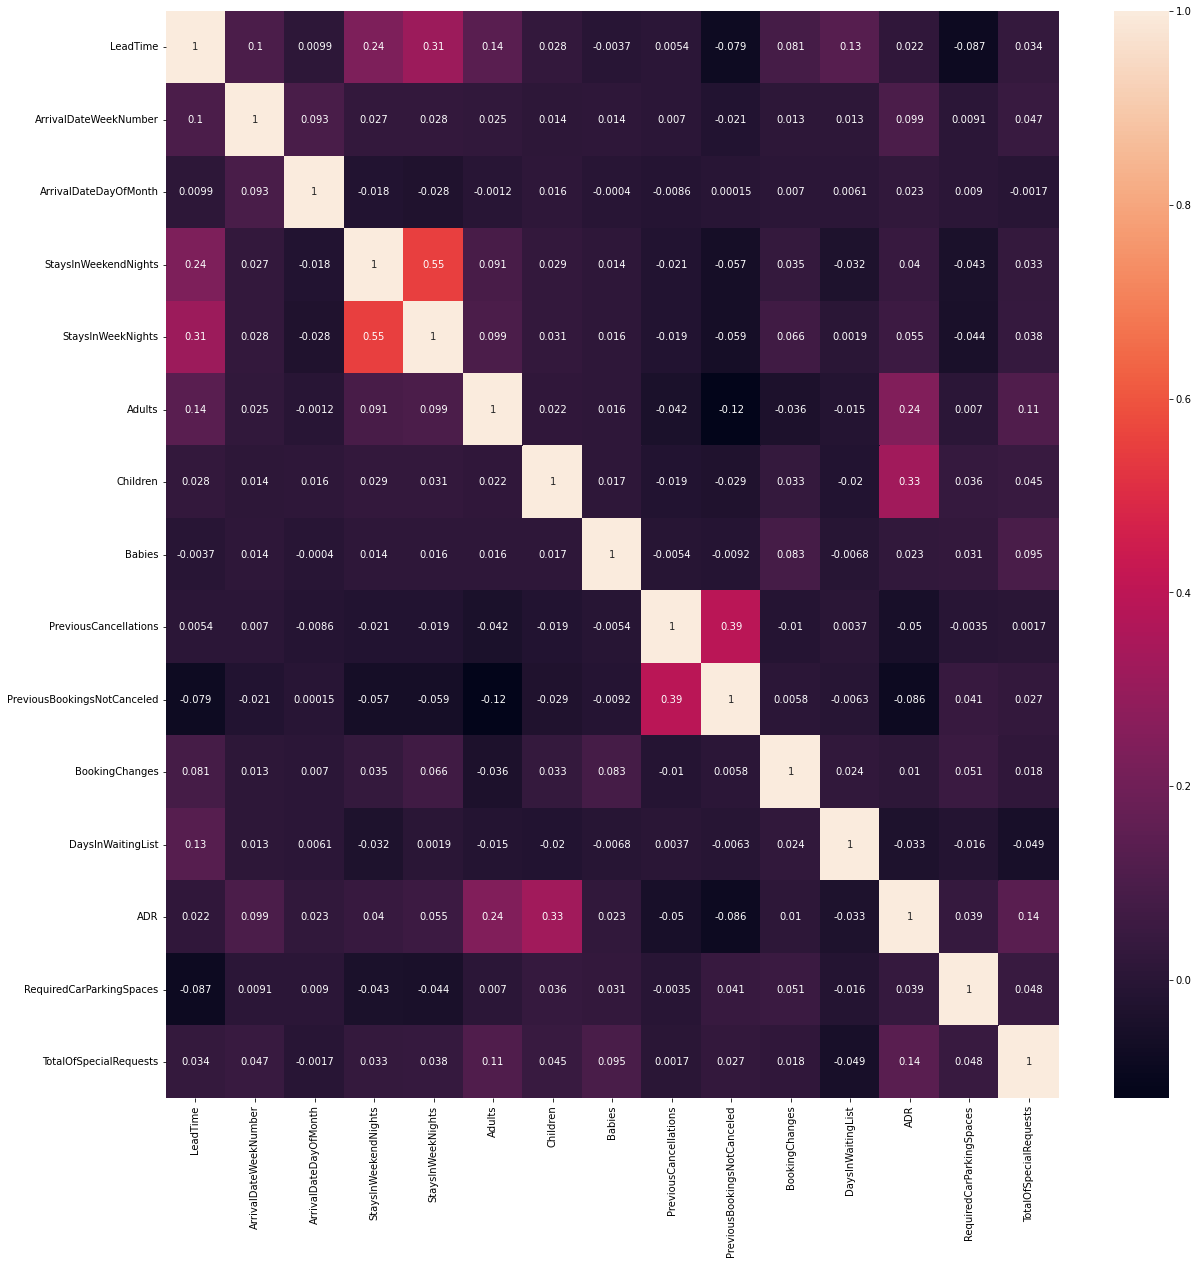

In [39]:
plt.figure(figsize=(20,20))
sb.heatmap(df.corr(), annot=True)
#plt.savefig("corr.png",bbox_inches='tight' )
plt.show()

In [41]:
dfX = df[df.columns[~df.columns.isin(category)]]
dfX

,LeadTime,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,342,27,1,0,0,2,0.0,0,0,0,3,0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,4,0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87225,23,35,30,2,5,2,0.0,0,0,0,0,0,96.14,0,0
87226,102,35,31,2,5,3,0.0,0,0,0,0,0,225.43,0,2
87227,34,35,31,2,5,2,0.0,0,0,0,0,0,157.71,0,4
87228,109,35,31,2,5,2,0.0,0,0,0,0,0,104.40,0,0


# Normalize the data set using Min-Max Scaling: 

In [42]:
from sklearn import preprocessing

In [43]:
scaler = preprocessing.MinMaxScaler()

In [44]:
names = dfX.columns

In [45]:
d = scaler.fit_transform(dfX)

In [46]:
scaled_df = pd.DataFrame(d,columns=names)

In [110]:
scaled_df.head().T

,0,1,2,3,4
LeadTime,0.464043,1.000000,0.009498,0.017639,0.018996
ArrivalDateWeekNumber,0.500000,0.500000,0.500000,0.500000,0.500000
ArrivalDateDayOfMonth,0.000000,0.000000,0.000000,0.000000,0.000000
StaysInWeekendNights,0.000000,0.000000,0.000000,0.000000,0.000000
StaysInWeekNights,0.000000,0.000000,0.020000,0.020000,0.040000
Adults,0.036364,0.036364,0.018182,0.018182,0.036364
Children,0.000000,0.000000,0.000000,0.000000,0.000000
Babies,0.000000,0.000000,0.000000,0.000000,0.000000
PreviousCancellations,0.000000,0.000000,0.000000,0.000000,0.000000
PreviousBookingsNotCanceled,0.000000,0.000000,0.000000,0.000000,0.000000


# converting response variable to int so that  KNN will treat this attribute as numeric attribute

In [ ]:
dfY = df["IsCanceled"]
dfY = dfY.astype(int) 

# Divide the dataset to training and test sets.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,dfY, test_size=0.2,random_state=40)


# Modeling with KNN algorithm

In [ ]:
# The K-NN algorithm can be used for both classification and regression,
#but it is more commonly employed for classification.
#The K-Nearest Neighbour algorithm is based on the Supervised Learning technique
# it is one of the simplest Machine Learning algorithms.
#The K-NN method thinks that the new case/data and existing cases are comparable,
# and it places the new case in the category that is closest to the existing categories.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

### Choosing k-value

In [52]:
error_rate=[]
for i in range(1,50): # sqrt of rows is 47.3
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

In [77]:
# error rate = (1 - (correct predictions / total predictions)) * 100

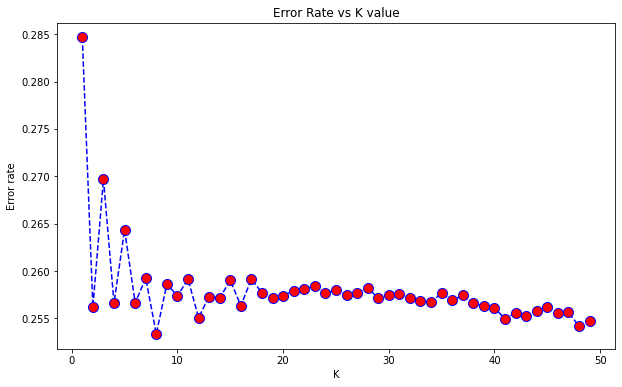

In [78]:

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')
## Display the visualization of the Confusion Matrix.
plt.savefig("Error Rate corresponding knn.png",bbox_inches='tight' )
plt.show()


### checking with k=8

In [54]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
pred_k=knn.predict(X_test)
pred_k

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cf_matrix = confusion_matrix(y_test,pred_k)
print(cf_matrix)
print(classification_report(y_test,pred_k))
print(accuracy_score(y_test,pred_k)*100)

[[11741   872]
 [ 3548  1285]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84     12613
           1       0.60      0.27      0.37      4833

    accuracy                           0.75     17446
   macro avg       0.68      0.60      0.60     17446
weighted avg       0.72      0.75      0.71     17446

74.66467958271237


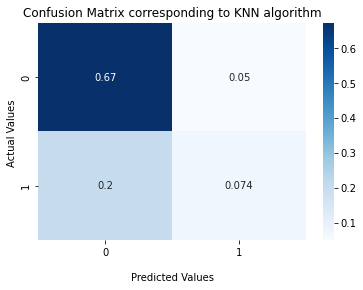

In [99]:
ax = sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix corresponding to KNN algorithm');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
# plt.savefig("cf_matrix1.png",bbox_inches='tight' )
plt.show()

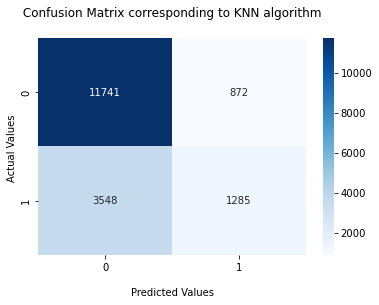

In [97]:
ax = sb.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues')

ax.set_title(' Confusion Matrix corresponding to KNN algorithm \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.savefig("cf_matrix_KNN.png",bbox_inches='tight' )
plt.show()

### Logistic Regression

In [83]:
# import sklearn.cross_validation from train_test_split

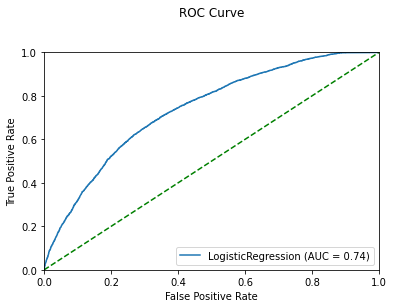

In [87]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
metrics.plot_roc_curve(model, X_test, y_test) 
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve\n\n')
#plt.savefig("ROC Curve.png",bbox_inches='tight' )
plt.show()

In [89]:
predict_logistic=model.predict(X_test)

In [94]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cf_matrix_logistic = confusion_matrix(y_test,predict_logistic)
print(confusion_matrix(y_test,predict_logistic))
classification_report_logistic = classification_report(y_test,predict_logistic)
print(classification_report_logistic)
print(accuracy_score(y_test,predict_logistic)*100)

[[12185   428]
 [ 4124   709]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.84     12613
           1       0.62      0.15      0.24      4833

    accuracy                           0.74     17446
   macro avg       0.69      0.56      0.54     17446
weighted avg       0.71      0.74      0.67     17446

73.90805915396079


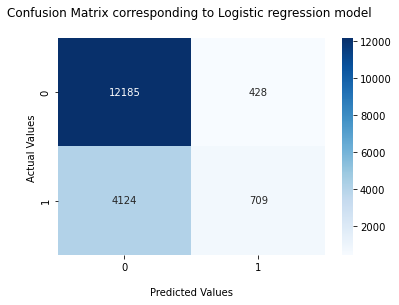

In [100]:
ax = sb.heatmap(cf_matrix_logistic, annot=True, fmt="d", cmap='Blues')

ax.set_title('Confusion Matrix corresponding to Logistic regression model \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
# plt.savefig("Confusion Matrix corresponding to Logistic regression model.png",bbox_inches='tight' )
plt.show()

In [101]:
from sklearn.ensemble  import RandomForestClassifier 

In [102]:
model=RandomForestClassifier(n_estimators=20)

In [103]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# predicted value

In [105]:
model_predicted=model.predict(X_test) 
model_predicted

array([0, 0, 0, ..., 0, 0, 1])

In [106]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,model_predicted)
matrix

array([[11567,  1046],
       [ 2788,  2045]])

Text(69.0, 0.5, 'Actual Values')

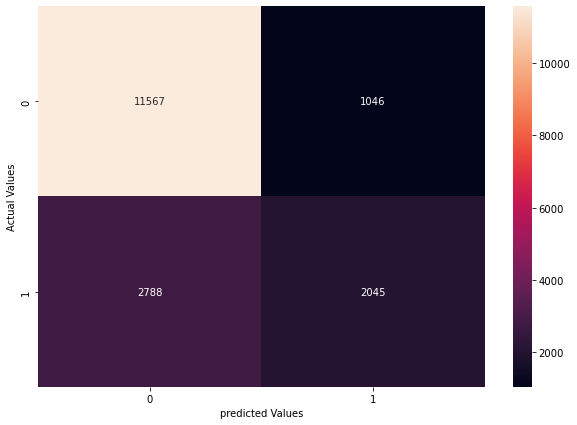

In [108]:
plt.figure(figsize=(10,7))
sb.heatmap(matrix,annot=True,fmt="d")
plt.xlabel("predicted Values")
plt.ylabel("Actual Values")

In [339]:
#import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=dfX.columns).sort_values(ascending=False)
feature_imp

LeadTime                       0.236495
ADR                            0.211342
ArrivalDateDayOfMonth          0.133497
ArrivalDateWeekNumber          0.133080
StaysInWeekNights              0.067852
TotalOfSpecialRequests         0.047616
StaysInWeekendNights           0.038512
RequiredCarParkingSpaces       0.031503
BookingChanges                 0.024730
PreviousCancellations          0.023641
Adults                         0.022558
Children                       0.014759
PreviousBookingsNotCanceled    0.008484
DaysInWaitingList              0.003910
Babies                         0.002022
dtype: float64

In [340]:
feature_imp.sort_values(ascending=False)

LeadTime                       0.236495
ADR                            0.211342
ArrivalDateDayOfMonth          0.133497
ArrivalDateWeekNumber          0.133080
StaysInWeekNights              0.067852
TotalOfSpecialRequests         0.047616
StaysInWeekendNights           0.038512
RequiredCarParkingSpaces       0.031503
BookingChanges                 0.024730
PreviousCancellations          0.023641
Adults                         0.022558
Children                       0.014759
PreviousBookingsNotCanceled    0.008484
DaysInWaitingList              0.003910
Babies                         0.002022
dtype: float64